In [1]:
import pandas as pd
import numpy as np

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
train_data = pd.read_csv("Train_Data.csv")
train_data.tail(100)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
9427,FIN1009428,575003,6/24/2008,575002.0,F,11/9/1980,M,NaN,Graduate,6/3/2008,...,Probation,M,3/21/1980,0.0,0.0,0.0,0.0,0.0,0.0,0
9428,FIN1009429,226001,6/24/2008,226001.0,F,1/11/1961,S,Business,Graduate,5/13/2008,...,Probation,F,9/11/1973,3.0,0.0,0.0,0.0,0.0,0.0,0
9429,FIN1009430,452003,6/24/2008,450001.0,M,5/5/1982,S,Salaried,Class XII,4/29/2008,...,Probation,F,6/2/1982,4.0,0.0,0.0,0.0,0.0,0.0,0
9430,FIN1009431,520010,6/24/2008,520003.0,M,3/24/1975,M,Salaried,Graduate,12/3/2007,...,Confirmation,M,2/6/1973,1.0,1.0,412140.0,11.0,412140.0,11.0,0
9431,FIN1009432,202001,6/25/2008,202001.0,F,4/5/1986,M,NaN,Graduate,1/8/2004,...,Confirmation,M,7/2/1968,0.0,0.0,373069.0,11.0,373069.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,FIN1009523,160017,7/1/2008,160032.0,M,1/18/1970,M,Salaried,Graduate,5/5/2008,...,Probation,M,5/10/1967,0.0,0.0,0.0,0.0,0.0,0.0,0
9523,FIN1009524,848101,7/1/2008,848302.0,M,9/11/1956,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9524,FIN1009525,753012,7/1/2008,753014.0,F,8/7/1975,M,Salaried,Graduate,8/22/2006,...,Confirmation,M,7/22/1970,0.0,0.0,316126.0,9.0,305775.0,8.0,0
9525,FIN1009526,575003,7/1/2008,571248.0,M,12/23/1986,S,Salaried,Class XII,6/5/2008,...,Probation,M,9/23/1976,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
test_data = pd.read_csv("Test_Data.csv")
test_data.tail(100)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
4945,FIN1014473,751009,12/31/2008,754119.0,F,6/7/1972,S,NaN,Graduate,12/18/2008,...,4.0,Probation,F,7/11/1972,0.0,0.0,0.0,0.0,0.0,0.0
4946,FIN1014474,680001,1/1/2009,680587.0,M,6/7/1950,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4947,FIN1014475,641018,1/1/2009,641012.0,M,5/9/1971,M,Business,Graduate,12/2/2008,...,4.0,Probation,M,1/8/1974,0.0,0.0,0.0,0.0,0.0,0.0
4948,FIN1014476,273001,1/1/2009,274407.0,M,1/3/1983,M,Business,Graduate,12/9/2008,...,3.0,Probation,M,8/7/1976,0.0,0.0,0.0,0.0,0.0,0.0
4949,FIN1014477,530003,1/1/2009,530028.0,F,4/6/1974,M,NaN,Graduate,12/3/2008,...,2.0,Probation,M,7/13/1972,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,FIN1014568,691008,1/1/2009,691601.0,F,5/21/1966,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5041,FIN1014569,691008,1/1/2009,691601.0,M,12/2/1949,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5042,FIN1014570,691008,1/1/2009,691005.0,M,5/20/1977,M,Business,Class XII,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5043,FIN1014571,208001,1/1/2009,208022.0,M,7/22/1985,M,NaN,Graduate,9/25/2008,...,3.0,Probation,M,6/26/1978,4.0,1.0,15347.0,1.0,15347.0,1.0


In [5]:
train_data.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [6]:
test_data.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
count,5045.000000,5011.000000,4221.000000,4221.000000,4221.000000,4.221000e+03,4221.000000,4.221000e+03,4221.000000
mean,431478.138751,433049.851527,3.352760,2.521204,1.104951,1.115425e+05,3.864250,9.895073e+04,3.495143
std,230425.779147,231655.574011,0.994504,2.491566,1.473985,1.640698e+05,4.688678,1.469193e+05,4.241165
min,110005.000000,110001.000000,2.000000,0.000000,0.000000,-3.196900e+04,0.000000,-3.196900e+04,0.000000
25%,221010.000000,224141.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,400705.000000,411005.000000,3.000000,2.000000,1.000000,5.002600e+04,2.000000,4.653700e+04,2.000000
75%,641018.000000,641002.000000,4.000000,4.000000,2.000000,1.757620e+05,7.000000,1.537820e+05,6.000000
max,851101.000000,884112.000000,8.000000,17.000000,10.000000,2.196480e+06,31.000000,2.196480e+06,30.000000


In [7]:
train_data.shape

(9527, 23)

In [8]:
train_data.info

<bound method DataFrame.info of               ID  Office_PIN Application_Receipt_Date  Applicant_City_PIN  \
0     FIN1000001      842001                4/16/2007            844120.0   
1     FIN1000002      842001                4/16/2007            844111.0   
2     FIN1000003      800001                4/16/2007            844101.0   
3     FIN1000004      814112                4/16/2007            814112.0   
4     FIN1000005      814112                4/16/2007            815351.0   
...          ...         ...                      ...                 ...   
9522  FIN1009523      160017                 7/1/2008            160032.0   
9523  FIN1009524      848101                 7/1/2008            848302.0   
9524  FIN1009525      753012                 7/1/2008            753014.0   
9525  FIN1009526      575003                 7/1/2008            571248.0   
9526  FIN1009527      411006                 7/1/2008            411006.0   

     Applicant_Gender Applicant_BirthDate A

In [9]:
train_data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [10]:
train_data['Manager_Num_Products2'].fillna(7, inplace = True)
train_data['Manager_Business2'].fillna(1.829263e+05, inplace = True)
train_data['Manager_Num_Products'].fillna(7, inplace = True)
train_data['Manager_Business'].fillna(1.843710e+05, inplace = True)
train_data['Manager_Num_Coded'].fillna(0.758933, inplace = True)
train_data['Manager_Grade'].fillna(3, inplace = True)
train_data['Manager_Num_Application'].fillna(2, inplace = True)


In [11]:
test_data['Manager_Num_Products2'].fillna(3.5, inplace = True)
test_data['Manager_Business2'].fillna(9.895073e+04, inplace = True)
test_data['Manager_Num_Products'].fillna(4, inplace = True)
test_data['Manager_Business'].fillna(1.115425e+05, inplace = True)
test_data['Manager_Num_Coded'].fillna(1, inplace = True)
test_data['Manager_Grade'].fillna(3, inplace = True)
test_data['Manager_Num_Application'].fillna(2.5, inplace = True)

In [12]:
train_data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                     0
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [13]:
test_data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                     0
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
dtype: int64

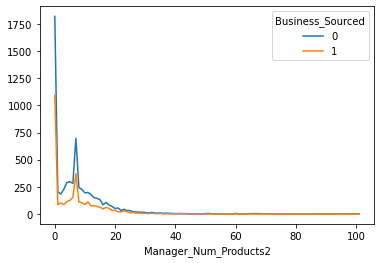

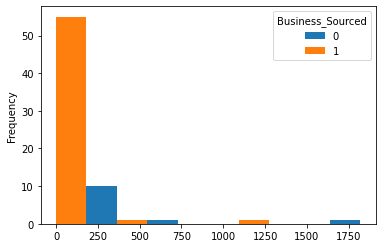

In [16]:
manager1 = pd.crosstab(index = train_data['Manager_Num_Products2'],columns = train_data['Business_Sourced'])
manager1.plot.line();
manager1.plot.hist();

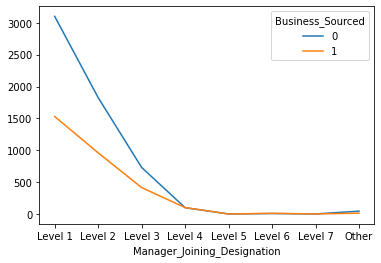

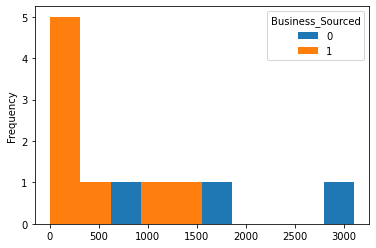

In [19]:
manager2 = pd.crosstab(index = train_data['Manager_Joining_Designation'],columns = train_data['Business_Sourced'])
manager2.plot.line();
manager2.plot.hist();

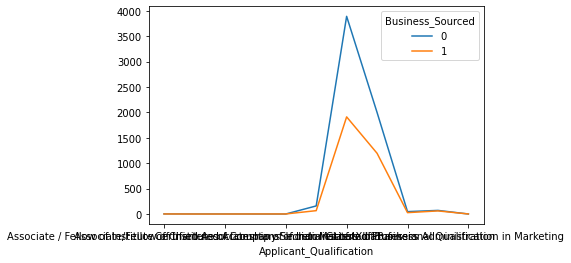

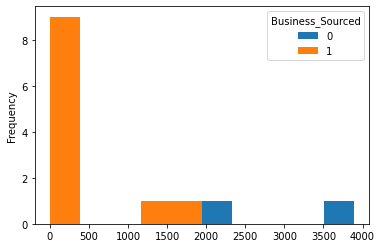

In [21]:
manager1 = pd.crosstab(index = train_data['Applicant_Qualification'],columns = train_data['Business_Sourced'])
manager1.plot.line();
manager1.plot.hist();

In [22]:
# Getting Features
features = ['Manager_Num_Products2','Manager_Num_Products','Manager_Business','Manager_Business2','Manager_Num_Coded', 'Manager_Num_Application','Manager_Grade']
x = pd.get_dummies(train_data[features])

# Predicting value
y = train_data['Business_Sourced']

In [23]:
xtest = test_data[features]

In [27]:
!pip install imblearn

In [29]:
!pip install lightgbm

In [31]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=c187189e166b48f3e9fbd0687c296fa3191df8f492f61d90a9448074152dac35
  Stored in directory: c:\users\sreyoshi\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107415 sha256=c3d977e4fc5a9b71407f9161857544fcb1047f230c7adf1542d3cc3e10792a7a
  Stored in directory: c:\users\sreyoshi\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik


In [33]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=9a6e24baed2f2d9c3a8fdf7a83376976f156f04edf56d429e3b75a72a1329134
  Stored in directory: c:\users\sreyoshi\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [34]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from collections import Counter
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.svm import SVC
import plotly.express as px

In [24]:
def preprocessing(data,features,labels,test_size = 0.2,random_state =42, tune = 'n',cv_folds = 5):
    
    print('Checking if labels or features are categorical! [*]\n')
    cat_features=[i for i in features.columns if features.dtypes[i]=='object']
    if len(cat_features) >= 1 :
        index = []
        for i in range(0,len(cat_features)):
            index.append(features.columns.get_loc(cat_features[i]))
        print('Features are Categorical\n')
        ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), index)], remainder='passthrough')
        print('Encoding Features [*]\n')
        features = np.array(ct.fit_transform(features))
        print('Encoding Features Done [',u'\u2713',']\n')
    if labels.dtype == 'O':
        le = LabelEncoder()
        print('Labels are Categorical [*] \n')
        print('Encoding Labels \n')
        labels = le.fit_transform(labels)
        print('Encoding Labels Done [',u'\u2713',']\n')
    else:
        print('Features and labels are not categorical [',u'\u2713',']\n')
        
    ## SMOTE ---------------------------------------------------------------------
    print('Applying SMOTE [*]\n')
    
    sm=SMOTE(k_neighbors=4)
    features,labels=sm.fit_resample(features,labels)
    print('SMOTE Done [',u'\u2713',']\n')
    
    ## Splitting ---------------------------------------------------------------------
    print('Splitting Data into Train and Validation Sets [*]\n')
    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size= test_size, random_state= random_state)
    print('Splitting Done [',u'\u2713',']\n')
    
    ## Scaling ---------------------------------------------------------------------
    print('Scaling Training and Test Sets [*]\n')
    
    sc = StandardScaler()
    X_train = sc.fit_transform(x_train)
    X_val = sc.transform(x_test)
    print('Scaling Done [',u'\u2713',']\n')
    
    print('Training All Basic Classifiers on Training Set [*] \n')
    
    parameters_svm= [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9, 1],
        'C': np.logspace(-4, 4, 5)},
    ]
    parameters_lin = [{
    'penalty': ['l1', 'l2', ],
    'solver': ['newton-cg', 'liblinear', ],
    'C': np.logspace(-4, 4, 5),
    }]
    parameters_knn = [{
    'n_neighbors': list(range(0, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'brute'],
    }]
    parameters_dt = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,  6,  8,  10,  12,  20,  40, 70],

    }]
    parameters_rfc = [{
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300, 500, 750, 1000],
    'max_features': [2, 3],
    }]
    parameters_xgb = [{
    'max_depth': [4,  6,  8,  10],
    'learning_rate': [0.3, 0.1],
    }]
    parameters_lgbm =  {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    }
    paramters_pac = {
        'C': np.logspace(-4, 4, 20)},
    
    
    param_nb={}
    parameters_ada={
            'learning_rate': [0.005, 0.01],
            'n_estimators': [8,16,24],
    }
    paramters_sgdc = [{
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['hinge', 'log'],
    'alpha':np.logspace(-4, 4, 20),
    }]
    models =[("LR", LogisticRegression(), parameters_lin),("SVC", SVC(),parameters_svm),('KNN',KNeighborsClassifier(),parameters_knn),
    ("DTC", DecisionTreeClassifier(),parameters_dt),("GNB", GaussianNB(), param_nb),("SGDC", SGDClassifier(), paramters_sgdc),('RF',RandomForestClassifier(),parameters_rfc),
    ('ADA',AdaBoostClassifier(),parameters_ada),('XGB',GradientBoostingClassifier(),parameters_xgb),('LGBN', LGBMClassifier(),parameters_lgbm),
    ('PAC',PassiveAggressiveClassifier(),paramters_pac)]

    results = []
    names = []
    finalResults = []
    accres = []

    for name,model, param in models:
        
        model.fit(x_train, y_train)
        model_results = model.predict(x_test)
        accuracy = accuracy_score(y_test, model_results)
        print('Validation Accuracy is :',accuracy)
        print('Applying K-Fold Cross validation on Model {}[*]'.format(name))
        accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=cv_folds, scoring='accuracy')
        print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
        acc = accuracies.mean()*100
        print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) 
        results.append(acc)
        names.append(name)
        accres.append((name,acc))
        if tune == 'y' and not name == 'GNB':
            print('Applying Grid Search Cross validation for model {} []\n'.format(name))
            cv_params = param
            grid_search = GridSearchCV(
            estimator=model,
            param_grid=cv_params,
            scoring='accuracy',
            cv=cv_folds,
            n_jobs=-1,
            verbose=4,
                )
            grid_search.fit(X_train, y_train)
            best_accuracy = grid_search.best_score_
            best_parameters = grid_search.best_params_
            print("Best Accuracy for model {}: {:.2f} %".format(name,best_accuracy*100))
            print("Best Parameters: for model {}".format(name), best_parameters)
            print('Applying Grid Search Cross validation Done[',u'\u2713',']\n')
            
        print('Training Compeleted Showing Predictions [',u'\u2713','] \n')
    accres.sort(key=lambda k:k[1],reverse=True)
    print("\n The Accuracy of the Models Are:\n ")
    tab = pd.DataFrame(accres)
    print(tab)
    sns.barplot(x=tab[1], y=tab[0], palette='mako');
    plt.show()
    print("\n\nModel With Highest Accuracy is: \n",accres[0],'\n\n')

Checking if labels or features are categorical! [*]

Features and labels are not categorical [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training All Basic Classifiers on Training Set [*] 

Validation Accuracy is : 0.4956070287539936
Applying K-Fold Cross validation on Model LR[*]
Accuracy: 50.68 %
Standard Deviation: 1.43 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.5435303514376997
Applying K-Fold Cross validation on Model SVC[*]
Accuracy: 53.32 %
Standard Deviation: 0.67 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.5738817891373802
Applying K-Fold Cross validation on Model KNN[*]
Accuracy: 58.33 %
Standard Deviation: 1.18 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.6425718849840255
Applying K-Fold Cross validation on Model DTC[*]
Accuracy: 63.65 %
Standard Dev

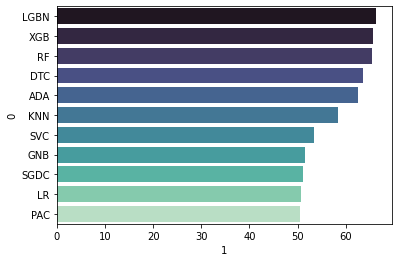



Model With Highest Accuracy is: 
 ('LGBN', 66.21403224504562) 




In [35]:
preprocessing(train_data,x,y)

In [37]:
model = LGBMClassifier()
history = model.fit(x,y)
y_pred = model.predict(pd.get_dummies(xtest))

In [38]:
output = pd.DataFrame({'ID': test_data.ID, 'Business_Scored': y_pred.astype(int)})
output.to_csv('submission.csv', index=False)

In [40]:
output.head(100)

,ID,Business_Scored
0,FIN1009528,0
1,FIN1009529,0
2,FIN1009530,0
3,FIN1009531,0
4,FIN1009532,0
...,...,...
95,FIN1009623,1
96,FIN1009624,0
97,FIN1009625,0
98,FIN1009626,0
